# Libraries

In [ ]:
!pip install scipy

In [44]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Supervised Learning vs Unsupervised Learning

|             |Supervised Learning|Unsupervised Learning|
|-------------|------------------------|---------------------|
|target(label)|target(label) 값이 주어짐  |target(label) 값이 주어지지 않음|
|task         |분류/예측                  |군집화                 |
|알고리즘       |Linear Regression       |Hierchical Clustering, DBSCAN, k-means 등|

# Clustering

<center><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_plusplus_001.png" alt="Clustering_example" width="400"></center>

<br>

클러스터링은 각 그룹의 데이터가 유사한 속성을 공유하도록 데이터를 그룹으로 구성하는 알고리즘 <br>
위의 그림에서와 같이 인접한 데이터 간의 특징을 이용하여 그룹화 가능 <br>

목적: 레이블이 없는 데이터에서 클러스터링 로직을 적용하여 데이터 내에 존재하는 패턴을 그룹화 하는 것 <br>
이 과정에서 **절대적인 기준은 없으며**, 결과를 보며 적절하게 데이터를 그룹화하였는지 평가 <br>
이러한 클러스터링을 진행하기 위해서는 적절한 **similarity measure**가 필요

## Similarity Measure

클러스터링 시 두 데이터 포인트가 유사한지 아닌지에 대한 판단 기준이 필요. <br>
similarity measure $S(x_i, x_k)$는 두 데이터 포인트가 유사할수록 크며 <br>
dissimilarity measure $D(x_i, x_k)$는 두 데이터 포인트가 유사할수록 작음. <br>

대표적인 similarity measure:

1. Vectors: Cosine Distance
$$s(\vec{x}, x') = \frac{x^t x'}{||x||||x'||} \tag{1}$$

2. Sets: Jaccard Distance
$$J(A, B) = \frac{|A\cap B|}{|A\cup B|} = \frac{|A\cap B|}{|A| + |B| - |A\cap B|} \tag{2}$$

$$
\begin{cases}
J(A, B)=1, &  집합\ A와\ B가\ 모두\ 공집합\\
0\leq J(A, B) \leq 1, & otherwise
\end{cases}
$$

3. Points: Euclidean Distance
$$d(x, x') = \left(\sum_{k=1}^p \left|x_k - x'_k\right|^q\right)^{1/q} \tag{3}$$

## Clustering Algorithms

클러스터링 알고리즘은 크게 아래의 4가지 유형으로 분류
1. Exclusive Clustering: 데이터 포인트가 한 클러스터에 속하면 다른 클러스터에 속할 수 없음
2. Overlapping Clustering: fuzzy sets 사용하여 데이터 포인트가 한 클러스터 이상에 속하지만 다른 멤버십 수준을 가지게 함
3. Hierarchical Clustering: 매 반복마다 가까운 두 클러스터를 합하여 하나의 클러스터로 구성하여 원하는 수준의 클러스터를 형성
4. Probabilistic Clustering: 특정 클러스터에 속할 확률을 바탕으로 클러스터 구축

<br>

대표적으로 사용되는 알고리즘은 아래와 같음
- K-means: exclusive clustering
- DBSCAN: exclusive clustering
- Fuzzy K-means: overlapping clustering
- Hierarchical clustering: hierarchical clustering
- Mixture of Gaussians: probabilistic clustering

### K-means

![](https://waterprogramming.wordpress.com/wp-content/uploads/2022/03/k_means_graphic.png)

데이터셋을 k개의 클러스터로 나누어 유사한 데이터 포인트들을 그룹화. <br>
데이터 포인트들을 k개의 클러스터로 나누어, 각 클러스터의 중심(centroid)과 데이터 포인트 간의 거리를 최소화 

<br>

<font style="font-size:20px"> 동작 방식 </font>
1. 클러스터 수 k 설정: 클러스터의 수 K 지정. 이는 사용자가 정하는 하이퍼파라미터(hyperparameter)
2. 초기화: k개의 클러스터 중심을 데이터 포인트에서 랜덤하게 선택
3. 클러스터 할당: 각 데이터 포인트를 가장 가까운 클러스터 중심으로 할당
4. 중심 업데이트: 클러스터에 속한 데이터 포인트들의 평균 위치로 각 클러스터의 새로운 중심을 계산
5. 수렴 확인: 클러스터 할당과 중심 업데이트 과정하며, 클러스터 할당이 더 이상 변경되지 않거나 중심의 변화가 매우 작아질 때까지 반복

<br>


<font style="font-size:20px"> 장점 </font>
1. 단순성: 알고리즘이 간단하여 이해하고 구현하기 쉬움
2. 효율성: 계산이 빠르며, 큰 데이터셋에서도 효율적으로 작동. 시간 복잡도는 일반적으로 $O(n⋅k⋅t)$ <br>
$n$: 데이터 포인트 수, $k$: 클러스터 수, $t$: 반복 횟수

<font style="font-size:20px"> 단점 </font>
1. 클러스터 수 k의 사전 설정: k를 사전에 설정해야 하는데, 최적의 k를 찾는 것은 데이터에 따라 어려울 수 있음
2. 구형 클러스터 가정: 클러스터가 구형(spherical)이라는 가정을 두어, 비구형 클러스터의 경우 성능이 떨어질 수 있음
3. 초기화의 민감성: 초기 클러스터 중심의 위치에 따라 결과가 달라질 수 있으며, 지역 최적해(local minima)에 빠질 가능성 존재. 이를 개선하기 위해 K-Means++와 같은 초기화 방법 사용
4. 클러스터 크기와 밀도: 클러스터의 크기와 밀도가 매우 다를 경우 잘 작동하지 않을 수 있음

<br>

<font style="font-size:20px"> K-Means++ </font>

K-평균++는 K-평균의 초기화 문제를 개선하기 위해 고안된 방법으로 초기 클러스터 중심을 좀 더 스마트하게 선택하여 알고리즘의 성능과 안정성을 향상. <br>
첫 번째 중심을 무작위로 선택 후 나머지 중심들은 현재 선택된 중심들과의 거리 기반으로 선택되며, 거리가 먼 데이터 포인트가 선택될 확률이 높음. <br>
이러한 방법으로 K-평균++는 K-평균의 성능을 개선하고, 더 나은 결과를 도출.

<br>

<font style="font-size:20px"> 사용 방법 </font>

> ```python
> from sklearn.cluster import KMeans
> 
> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
> kmeans.labels_    # 학습 데이터의 분류 상태 확인
>
> kemans.predict(X) # 학습된 특징을 바탕으로 새로운 데이터에 대해 예측
> ```

- Hyperparameters
    - n_clusters: 원하는 클러스터 개수
    - random_state: 랜덤성 재현을 위한 seed

In [3]:
iris = sns.load_dataset('iris')

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.iloc[:, :-1])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
iris['predicted_label'] = kmeans.labels_

In [26]:
char_to_idx = {
    'virginica': 0,
    'setosa': 1,
    'versicolor': 2,
}

In [34]:
(iris.species.apply(lambda x: char_to_idx.get(x)).values == iris.predicted_label).mean()

0.8933333333333333

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



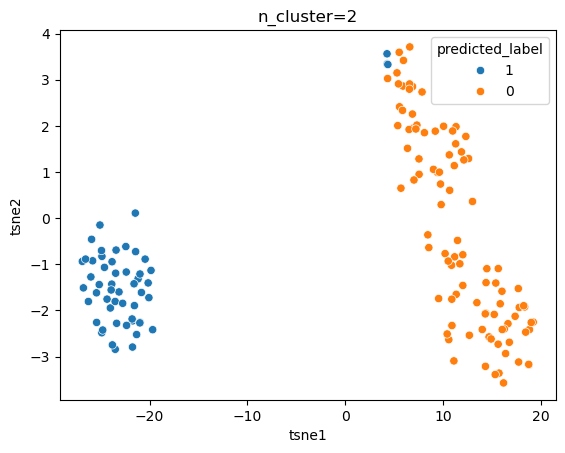

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



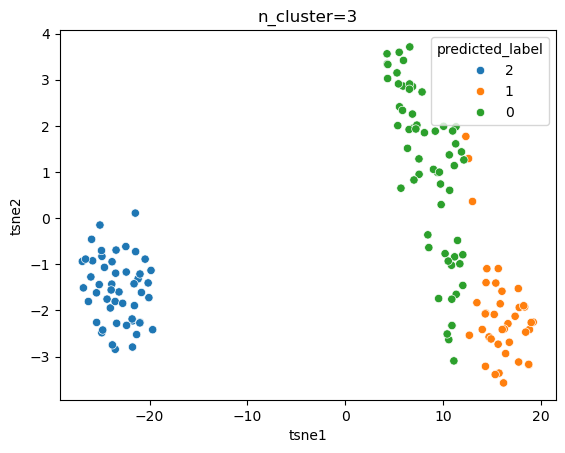

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



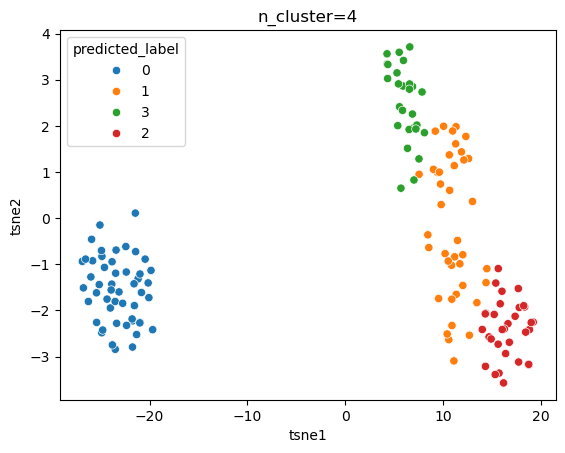

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



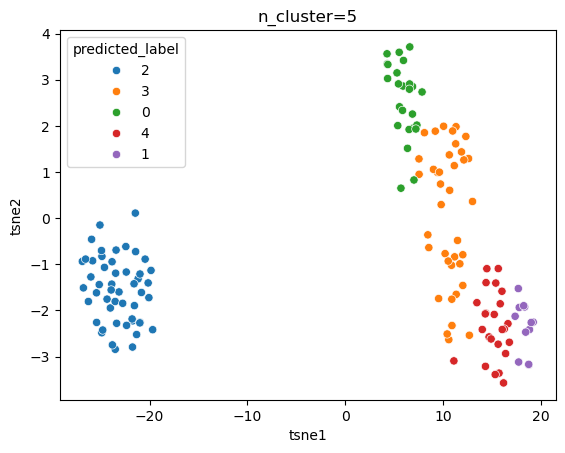

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



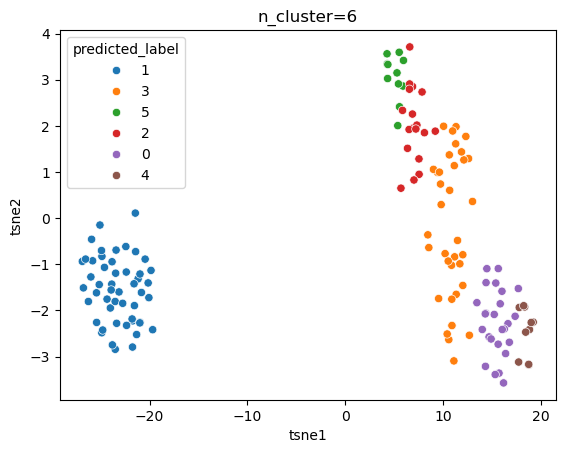

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



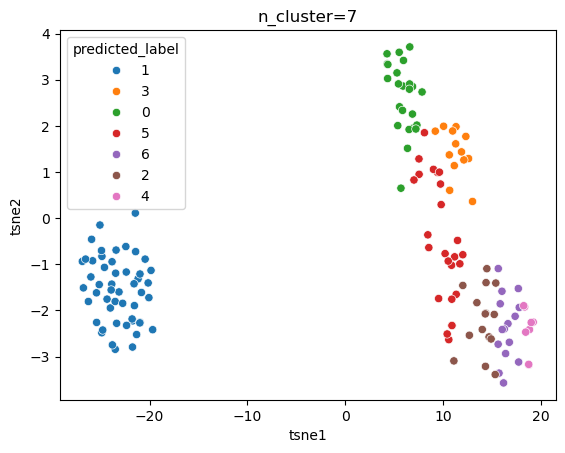

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



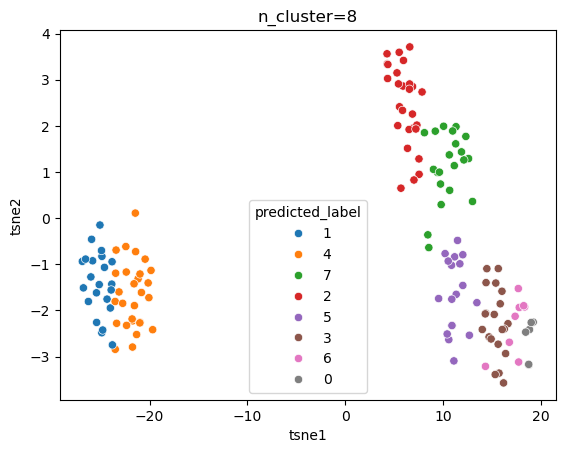

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



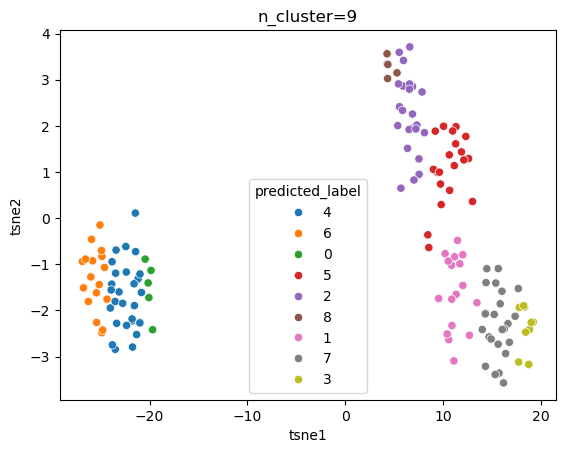

<Figure size 640x480 with 0 Axes>

In [48]:
accs = {}
for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(iris.iloc[:, :-2])
    iris['predicted_label'] = kmeans.labels_
    # acc = (iris.species.apply(lambda x: char_to_idx.get(x)).values == iris.predicted_label).mean()
    
    # accs.update({n_cluster: acc})

    tsne = TSNE(n_components=2)
    temp = pd.concat([
        pd.DataFrame(tsne.fit_transform(iris.iloc[:, :-2]), columns=['tsne1', 'tsne2']),
        iris.filter(items=['predicted_label']).astype(str)
    ], axis=1)

    sns.scatterplot(
        temp,
        x='tsne1',
        y='tsne2',
        hue='predicted_label',
    )
    plt.title(f'n_cluster={n_cluster}')
    plt.show()
    plt.clf()

### DBSCAN

![](https://machinelearninggeek.com/wp-content/uploads/2020/10/image-58.png)

데이터 포인트를 밀도 기반으로 클러스터링하여 밀도가 높은 지역을 클러스터로 정의하고, 밀도가 낮은 지역은 노이즈로 식별. <br>
데이터 포인트의 **레이블을 예측하는 기능을 가지고 있지 않아, 미래 값에 대한 예측에는 직접적으로 사용할 수 없음**.

<br>

<font style="font-size:20px"> 동작 방식 </font>
1. 필수 파라미터 설정: <br>
    - $\epsilon$: 두 데이터 포인트 간의 최대 거리로, 이 거리 내에 있는 데이터 포인트를 같은 클러스터로 간
    - minPts: 클러스터를 형성하기 위해 필요한 최소 데이터 포인트 수
2. 밀도 정의: <br>
    - core point: 주어진 $\epsilon$ 범위 내에 최소한 minPts 개의 포인트가 있을 때, 이 포인트는 core point로 간주
    - border point: $\epsilon$ 범위 내에 minPts 개수는 부족하지만, core point의 $\epsilon$ 범위 내에 있는 포인트
    - noise point: $\epsilon$ 범위 내에 minPts 개수가 없고, core point의 $\epsilon$ 범위 내에도 포함되지 않는 포인트
3. 클러스터 형성: <br>
    - core point에서 시작하여 ε 범위 내의 모든 포인트를 같은 클러스터로 확장
    - 연결된 포인트 추가: 연결된 포인트(경계 포인트 포함)와 더 가까운 core point를 찾아 클러스터를 확장합니다.
    - noise point 식별: 클러스터에 속하지 않는 포인트는 노이즈로 분류

<br>

<font style="font-size:20px"> 장점 </font>
1. 구형 클러스터 가정 없음: 클러스터의 형태와 크기에 대한 가정이 적음
2. 노이즈 처리: 밀도가 낮은 포인트를 노이즈로 분류 가능
3. 자동 클러스터 수 결정: 클러스터 수를 사전에 지정할 필요가 없음

<font style="font-size:20px"> 단점 </font>
1. 파라미터 민감성: $\epsilon$와 minPts 파라미터의 선택에 민감. 적절한 값을 찾는 것이 어려울 수 있으며, 데이터의 밀도 차이가 큰 경우 성능이 저하될 수 있음
2. 밀도 변화 처리 어려움: 클러스터의 밀도가 많이 다를 경우, 동일한 $\epsilon$ 값으로 모든 클러스터를 효과적으로 처리하기 어려울 수 있음

<br>

<font style="font-size:20px"> 사용 방법 </font>

> ```python
> from sklearn.cluster import DBSCAN
> 
> dbscan = DBSCAN(eps=3, min_samples=2).fit(X)
> dbscan.labels_    # 학습 데이터의 분류 상태 확인
>
> ```

- Hyperparameters
    - eps: 두 샘플 사이의 최대 거리 (default=0.5)
    - min_sample: 클러스터 형성을 위한 최소 샘플 수 (default=5)
    - metric: 두 샘플 사이의 거리 (default=euclidean)

In [ ]:
iris = sns.load_dataset('iris')

In [68]:
dbscan = DBSCAN(eps=0.6)
dbscan.fit(iris.iloc[:, :-2])
iris['predicted_label'] = dbscan.labels_
iris.predicted_label.value_counts()

predicted_label
 1    92
 0    49
-1     9
Name: count, dtype: int64

### Hierarchical Clustering

데이터 포인트를 계층으로 클러스터링. <br>
사전에 클러스터 수를 지정할 필요가 없음. <br>

Hierarchical Clustering은 아래의 두 분류 존재
1. Agglomerative hierarchical clustering
2. Divisive hierarchical clustering

<br>

<font style="font-size:20px"> Measures of Distance </font>
- Euclidean Distance
$$\sqrt{(x_2-x_1)^2 + (y_2 - y_1)^2}$$

- Hamming distance
<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/03/hamming-distance-algorithm_-80.jpg" alt="Hamming Distance" width="400"></center>

- Manhattan distance
$$|a-b|_1 = \sum_i |a_i - b_i|$$

- Minkowski distance
$$\left(\sum_{i=1}^n |X_i - Y_i|^p\right)^{1/p}$$

$$
\begin{cases}
manhattan\ distance, & p=1 \\
euclidean\ distance, & p=2
\end{cases}
$$

- Maximum distance
$$|a-b|_{\infty} = \max_i |a_i - b_i|$$

- Canberra distance
$$\sum_i \frac{|x_i - y_i|}{|x_i + y_i|}$$

<br>

<font style="font-size:20px"> Linkage Criterion </font>
<center><img src="https://drek4537l1klr.cloudfront.net/rhys/Figures/fig17-3_alt.jpg" alt="Linkage Criterion" width="400"></center>

<br>

클러스터 병합 시 거리의 기준점을 어디로 둘 것인지에 대한 기준.

1. Single linkage / nearest linkage: $$d(u,v) = \min(dist(u[i], v[j]))$$ 
2. Complete linkage: $$d(u,v) = \max(dist(u[i], v[j]))$$
3. Average linkage: $$d(u,v) = \sum_{i,j}\frac{d(u[i],v[j])}{(|u|\times|v|)}$$
4. Centroid linkage: $$d(u,v) = ||c_u - c_v||_2$$
5. Ward's linkage: variance의 증가가 최소화되도록 연결

<br>

<font style="font-size:20px"> Dendrogram </font>
<center><img src="https://i0.wp.com/spotintelligence.com/wp-content/uploads/2023/09/hierarchical-clustering-dendogram.png?resize=640%2C480&ssl=1" alt="Dendrogram" width="400"></center>

각 단계에서 클러스터 간 계층적 관계를 확인하기 위한 그림 <br>
덴드로그램을 그리면 원하는 수준에서 수평으로 잘라낸 다음, 잘라낸 아래에 있는 가지가 개별 군집과 그와 관련된 구성원을 형성 <br>

In [73]:
x = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
x

[[2], [8], [0], [4], [1], [9], [9], [0]]

Single linkage

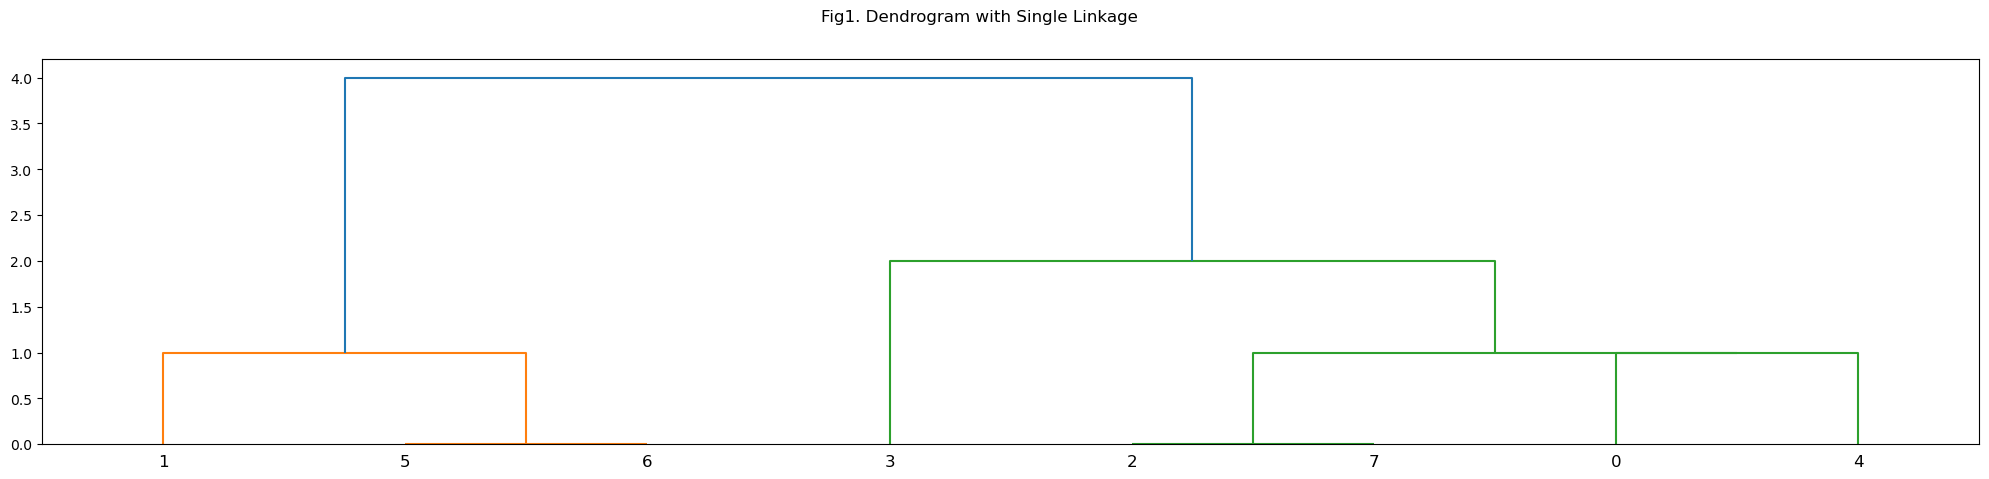

In [75]:
Z = linkage(x, 'single')
fig = plt.figure(figsize=(25 ,5))
plt.suptitle(
    'Fig1. Dendrogram with Single Linkage',    
)
dn = dendrogram(Z)

Complete linkage

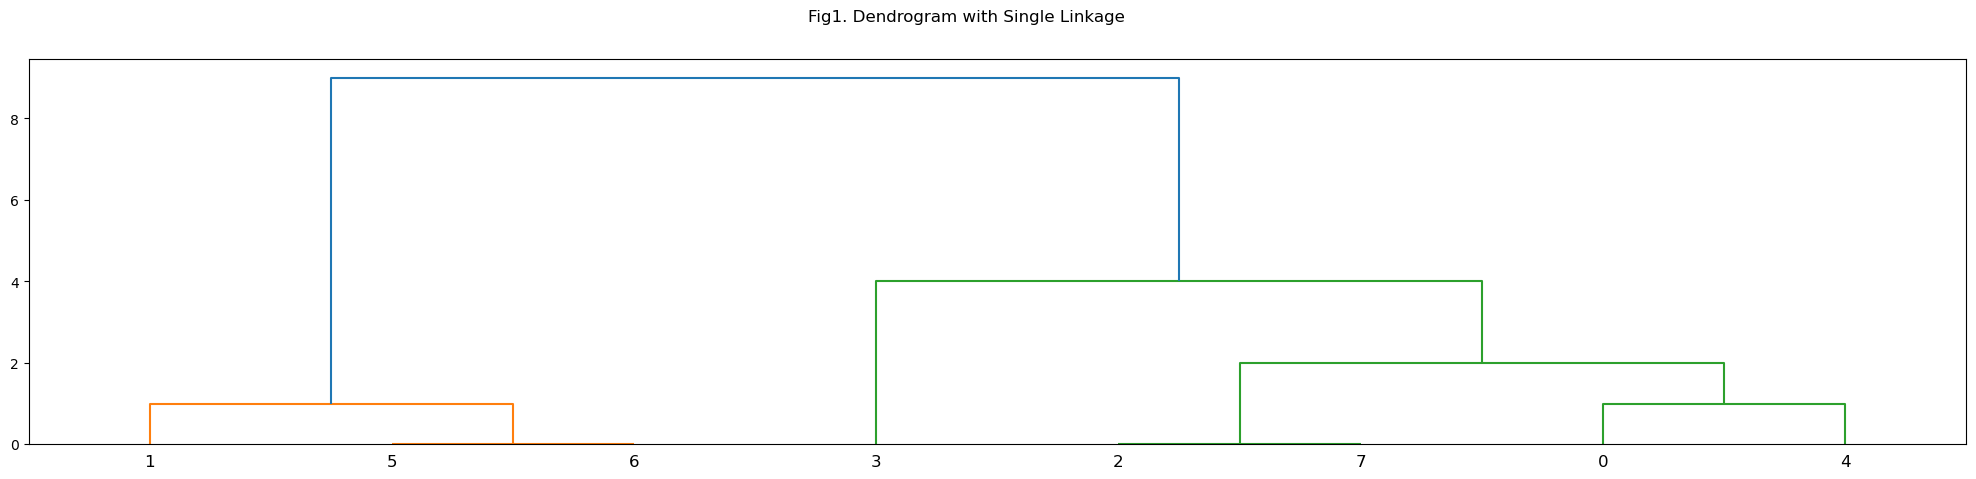

In [76]:
Z = linkage(x, 'complete')
fig = plt.figure(figsize=(25 ,5))
plt.suptitle(
    'Fig1. Dendrogram with Single Linkage',    
)
dn = dendrogram(Z)

Average linkage

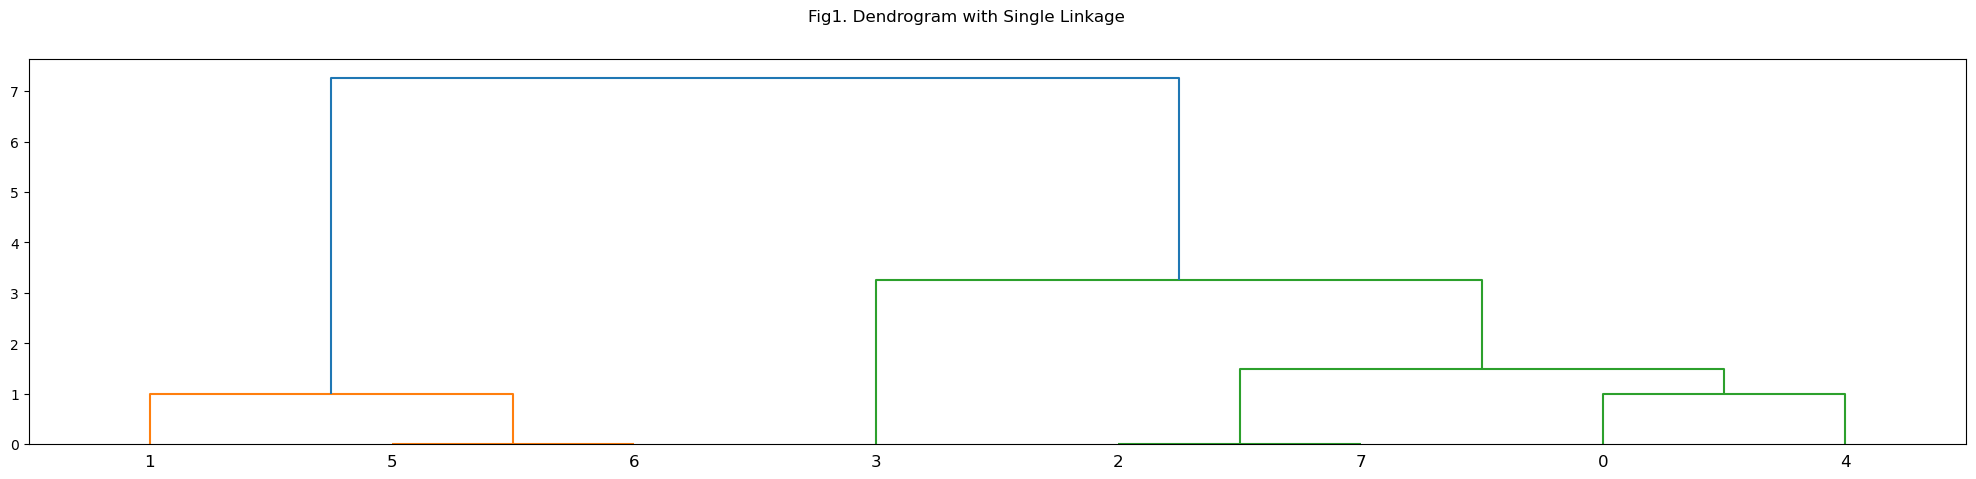

In [77]:
Z = linkage(x, 'average')
fig = plt.figure(figsize=(25 ,5))
plt.suptitle(
    'Fig1. Dendrogram with Single Linkage',    
)
dn = dendrogram(Z)

Centroid linkage

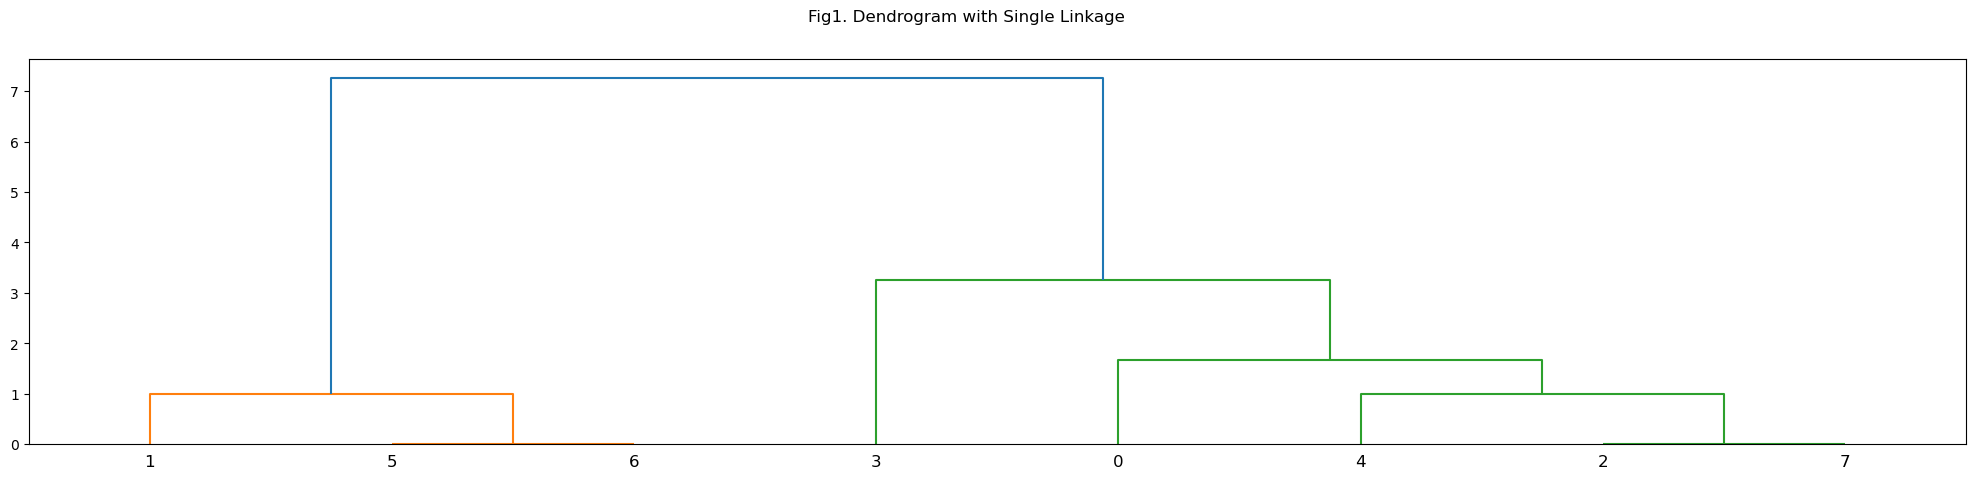

In [78]:
Z = linkage(x, 'centroid')
fig = plt.figure(figsize=(25 ,5))
plt.suptitle(
    'Fig1. Dendrogram with Single Linkage',    
)
dn = dendrogram(Z)

Ward's linkage

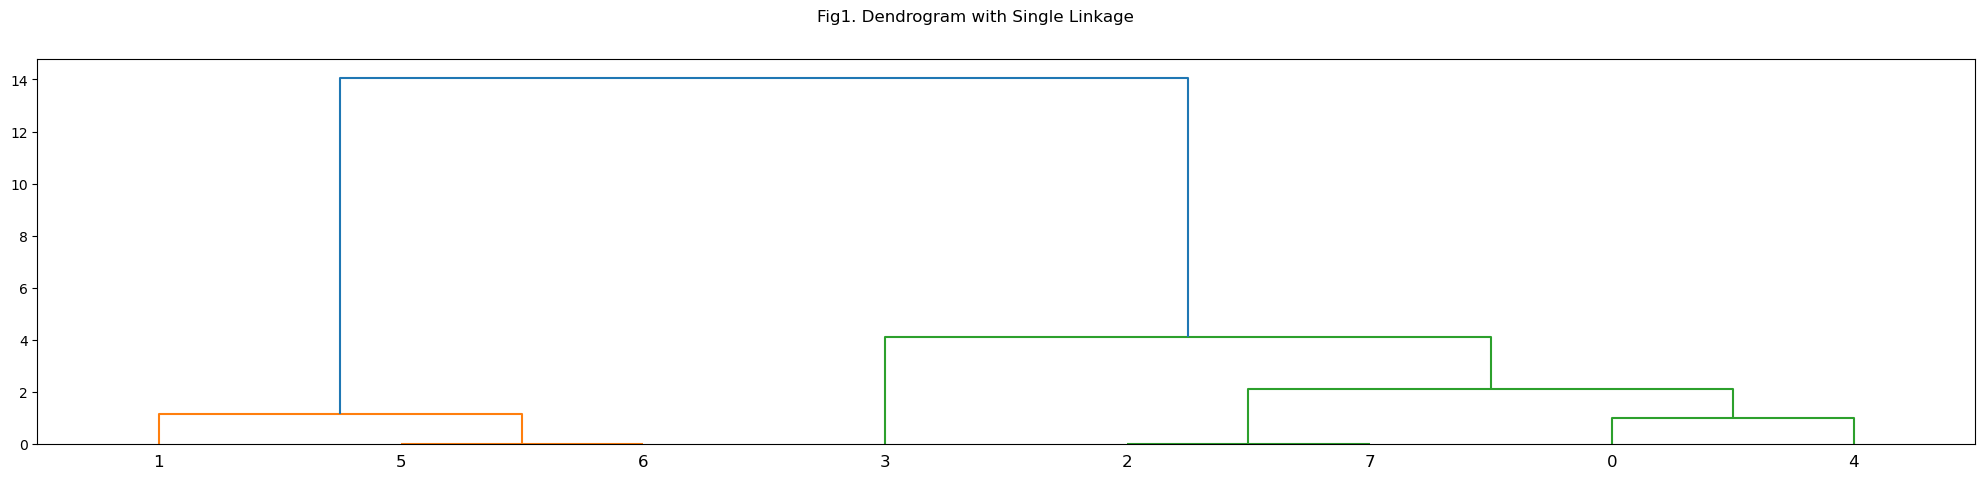

In [79]:
Z = linkage(x, 'ward')
fig = plt.figure(figsize=(25 ,5))
plt.suptitle(
    'Fig1. Dendrogram with Single Linkage',    
)
dn = dendrogram(Z)

Dendrogram

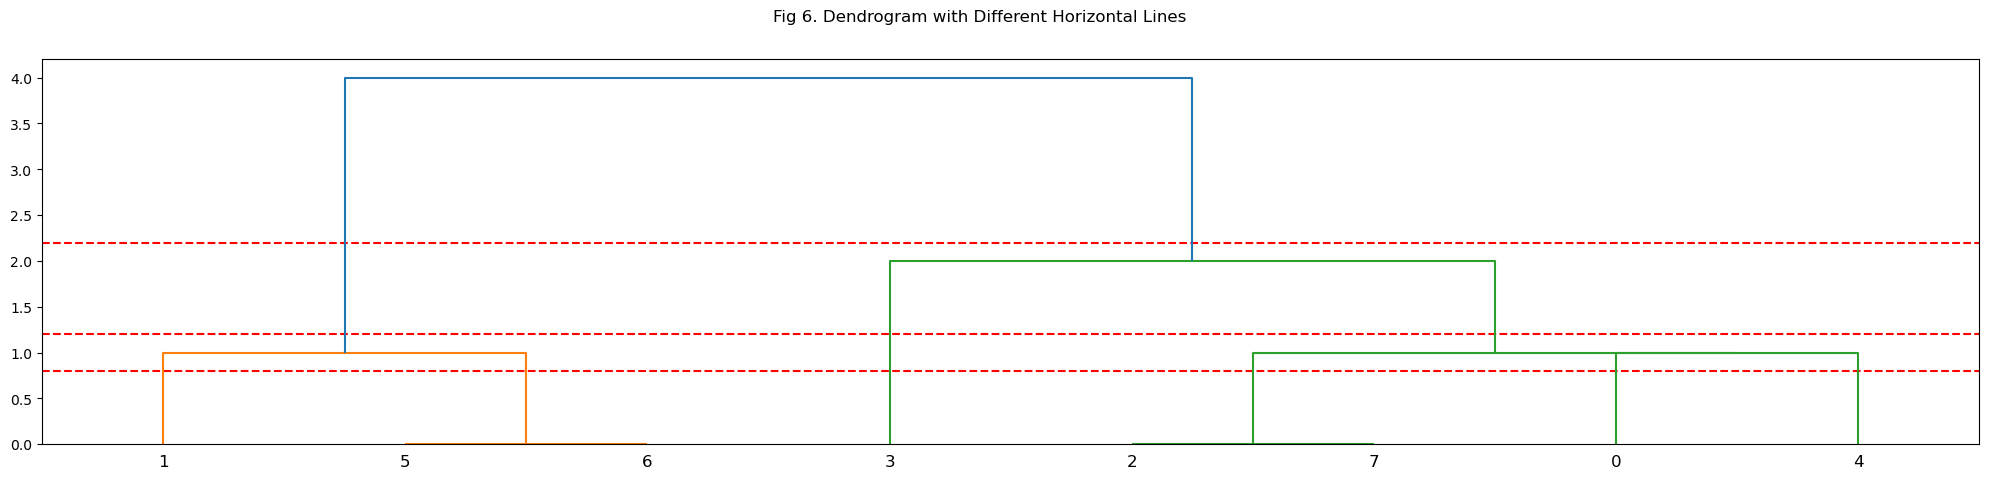

In [80]:
Z = linkage(x)
fig = plt.figure(figsize=(25 ,5))
plt.axhline(1.2, color='red', linestyle='--')
plt.axhline(2.2, color='red', linestyle='--')
plt.axhline(0.8, color='red', linestyle='--')
plt.suptitle(
    'Fig 6. Dendrogram with Different Horizontal Lines',
)
dn = dendrogram(Z)

##### Agglomerative Hierarchical Clustering

<center><img src="https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_43-1024x526.jpg" alt="Agglomerative Hierarchical Clustering" width="700", height="400"></center>

<center><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png" alt="Agglomerative Hierarchical Clustering according to Linkage" width="700", height="400"></center>

<br>

데이터 포인트 간 similarity를 기반으로 클러스터링 구축. <br>
bottom-up approach으로, 개별 클러스터에서 시작하여 매 iteration마다 클러스터를 원하는 K개의 클러스터를 식별할 때까지 차례로 병합. <br>
데이터를 사전에 레이블 없이 그룹화하는 방식으로 작동하기에 **예측 기능을 제공하지 않음**.

<br>

<font style="font-size:20px"> 동작 방식 </font>
1. 초기화: 각 데이터 포인트를 개별 클러스터로 설정
2. 병합: 가장 가까운 두 클러스터를 병합하여 새로운 클러스터 생성
3. 반복: 모든 데이터 포인트가 하나의 클러스터가 될 때까지 클러스터를 반복적으로 병합
4. 결과: 최종적으로 얻어진 클러스터는 덴드로그램(dendrogram)이라고 하는 계층적 구조로 표현

<br>

<font style="font-size:20px"> 장점 </font>
1. 클러스터의 수를 사전에 지정할 필요가 없음
2. 데이터의 계층적 구조를 시각화할 수 있는 덴드로그램을 생성

<font style="font-size:20px"> 단점 </font>
1. 계산 복잡도가 높아 대규모 데이터셋에서는 성능이 저하될 수 있음
2. 클러스터의 병합 순서가 최종 결과에 큰 영향을 미침

<br>

- 사용 방법
> ```python
> from sklearn.cluster import AgglomerativeClustering
> 
> agglomerative_clustering = AgglomerativeClustering().fit(X)
> clustering.labels_    # 학습 데이터의 분류 상태 확인
> ```

- Hyperparameters
    - n_clusters: 원하는 클러스터 개수
    - metric: distance metric
        - euclidean, l1, l2, manhattan, cosine, precomputed
    - linkage: linkage
        - ward, complete, average, single

##### Example

In [ ]:
!pip install yfinance

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

# plt.style.use("seaborn-darkgrid")
%matplotlib inline

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

sns.set_theme()
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [85]:
# Set the ticker as 'EURUSD=X'
forex_data = yf.download("USDEUR=X", start="2019-01-02", end="2022-06-30")
forex_data = forex_data.reset_index()
euro_df = forex_data[["Date", "Adj Close"]]
euro_df.rename(columns={"Adj Close": "euro"}, inplace=True)

forex_data1 = yf.download("USDRUB=X", start="2019-01-02", end="2022-06-30")
forex_data1 = forex_data1.reset_index()
rub_df = forex_data1[["Date", "Adj Close"]]
rub_df.rename(columns={"Adj Close": "rub"}, inplace=True)

forex_data2 = yf.download("USDGBP=X", start="2019-01-02", end="2022-06-30")
forex_data2 = forex_data2.reset_index()
gbp_df = forex_data2[["Date", "Adj Close"]]
gbp_df.rename(columns={"Adj Close": "gbp"}, inplace=True)

forex_data3 = yf.download("USDJPY=X", start="2019-01-02", end="2022-06-30")
forex_data3 = forex_data3.reset_index()
jpy_df = forex_data3[["Date", "Adj Close"]]
jpy_df.rename(columns={"Adj Close": "jpy"}, inplace=True)

forex_data4 = yf.download("USDKES=X", start="2019-01-02", end="2022-06-30")
forex_data4 = forex_data4.reset_index()
kes_df = forex_data4[["Date", "Adj Close"]]
kes_df.rename(columns={"Adj Close": "kes"}, inplace=True)

forex_data5 = yf.download("USDCNY=X", start="2019-01-02", end="2022-06-30")
forex_data5 = forex_data5.reset_index()
cny_df = forex_data5[["Date", "Adj Close"]]
cny_df.rename(columns={"Adj Close": "cny"}, inplace=True)

forex_data6 = yf.download("USDKRW=X", start="2019-01-02", end="2022-06-30")
forex_data6 = forex_data6.reset_index()
krw_df = forex_data6[["Date", "Adj Close"]]
krw_df.rename(columns={"Adj Close": "krw"}, inplace=True)

forex_data7 = yf.download("USDSGD=X", start="2019-01-02", end="2022-06-30")
forex_data7 = forex_data7.reset_index()
sgd_df = forex_data7[["Date", "Adj Close"]]
sgd_df.rename(columns={"Adj Close": "sgd"}, inplace=True)

forex_data8 = yf.download("USDTWD=X", start="2019-01-02", end="2022-06-30")
forex_data8 = forex_data8.reset_index()
twd_df = forex_data8[["Date", "Adj Close"]]
twd_df.rename(columns={"Adj Close": "twd"}, inplace=True)

forex_data9 = yf.download("USDNGN=X", start="2019-01-02", end="2022-06-30")
forex_data9 = forex_data9.reset_index()
ngn_df = forex_data9[["Date", "Adj Close"]]
ngn_df.rename(columns={"Adj Close": "ngn"}, inplace=True)

forex_data10 = yf.download("USDZAR=X", start="2019-01-02", end="2022-06-30")
forex_data10 = forex_data10.reset_index()
zar_df = forex_data10[["Date", "Adj Close"]]
zar_df.rename(columns={"Adj Close": "zar"}, inplace=True)

forex_data11 = yf.download("USDMYR=X", start="2019-01-02", end="2022-06-30")
forex_data11 = forex_data11.reset_index()
myr_df = forex_data11[["Date", "Adj Close"]]
myr_df.rename(columns={"Adj Close": "myr"}, inplace=True)

forex_data12 = yf.download("USDIDR=X", start="2019-01-02", end="2022-06-30")
forex_data12 = forex_data12.reset_index()
idr_df = forex_data12[["Date", "Adj Close"]]
idr_df.rename(columns={"Adj Close": "idr"}, inplace=True)

forex_data13 = yf.download("USDTHB=X", start="2019-01-02", end="2022-06-30")
forex_data13 = forex_data13.reset_index()
thb_df = forex_data13[["Date", "Adj Close"]]
thb_df.rename(columns={"Adj Close": "thb"}, inplace=True)

forex_data14 = yf.download("USDAUD=X", start="2019-01-02", end="2022-06-30")
forex_data14 = forex_data14.reset_index()
aud_df = forex_data14[["Date", "Adj Close"]]
aud_df.rename(columns={"Adj Close": "aud"}, inplace=True)

forex_data15 = yf.download("USDNZD=X", start="2019-01-02", end="2022-06-30")
forex_data15 = forex_data15.reset_index()
nzd_df = forex_data15[["Date", "Adj Close"]]
nzd_df.rename(columns={"Adj Close": "nzd"}, inplace=True)

forex_data16 = yf.download("USDCAD=X", start="2019-01-02", end="2022-06-30")
forex_data16 = forex_data16.reset_index()
cad_df = forex_data16[["Date", "Adj Close"]]
cad_df.rename(columns={"Adj Close": "cad"}, inplace=True)

forex_data17 = yf.download("USDCHF=X", start="2019-01-02", end="2022-06-30")
forex_data17 = forex_data17.reset_index()
chf_df = forex_data17[["Date", "Adj Close"]]
chf_df.rename(columns={"Adj Close": "chf"}, inplace=True)

forex_data18 = yf.download("USDNOK=X", start="2019-01-02", end="2022-06-30")
forex_data18 = forex_data18.reset_index()
nok_df = forex_data18[["Date", "Adj Close"]]
nok_df.rename(columns={"Adj Close": "nok"}, inplace=True)

forex_data19 = yf.download("USDAUD=X", start="2019-01-02", end="2022-06-30")
forex_data19 = forex_data19.reset_index()
sek_df = forex_data19[["Date", "Adj Close"]]
sek_df.rename(columns={"Adj Close": "sek"}, inplace=True)

forex_data20 = yf.download("USDARS=X", start="2019-01-02", end="2022-06-30")
forex_data20 = forex_data20.reset_index()
ars_df = forex_data20[["Date", "Adj Close"]]
ars_df.rename(columns={"Adj Close": "ars"}, inplace=True)

forex_data21 = yf.download("USDPLN=X", start="2019-01-02", end="2022-06-30")
forex_data21 = forex_data21.reset_index()
pln_df = forex_data21[["Date", "Adj Close"]]
pln_df.rename(columns={"Adj Close": "pln"}, inplace=True)

forex_data22 = yf.download("USDPHP=X", start="2019-01-02", end="2022-06-30")
forex_data22 = forex_data22.reset_index()
php_df = forex_data22[["Date", "Adj Close"]]
php_df.rename(columns={"Adj Close": "php"}, inplace=True)

forex_data23 = yf.download("USDRON=X", start="2019-01-02", end="2022-06-30")
forex_data23 = forex_data23.reset_index()
ron_df = forex_data23[["Date", "Adj Close"]]
ron_df.rename(columns={"Adj Close": "ron"}, inplace=True)

forex_data24 = yf.download("USDHUF=X", start="2019-01-02", end="2022-06-30")
forex_data24 = forex_data24.reset_index()
huf_df = forex_data24[["Date", "Adj Close"]]
huf_df.rename(columns={"Adj Close": "huf"}, inplace=True)

forex_data25 = yf.download("USDBRL=X", start="2019-01-02", end="2022-06-30")
forex_data25 = forex_data25.reset_index()
brl_df = forex_data25[["Date", "Adj Close"]]
brl_df.rename(columns={"Adj Close": "brl"}, inplace=True)

forex_data26 = yf.download("USDCLP=X", start="2019-01-02", end="2022-06-30")
forex_data26 = forex_data26.reset_index()
clp_df = forex_data26[["Date", "Adj Close"]]
clp_df.rename(columns={"Adj Close": "clp"}, inplace=True)

forex_data27 = yf.download("USDMXN=X", start="2019-01-02", end="2022-06-30")
forex_data27 = forex_data27.reset_index()
mxn_df = forex_data27[["Date", "Adj Close"]]
mxn_df.rename(columns={"Adj Close": "mxn"}, inplace=True)

forex_data28 = yf.download("USDCOP=X", start="2019-01-02", end="2022-06-30")
forex_data28 = forex_data28.reset_index()
cop_df = forex_data28[["Date", "Adj Close"]]
cop_df.rename(columns={"Adj Close": "cop"}, inplace=True)

forex_data29 = yf.download("USDILS=X", start="2019-01-02", end="2022-06-30")
forex_data29 = forex_data29.reset_index()
ils_df = forex_data29[["Date", "Adj Close"]]
ils_df.rename(columns={"Adj Close": "ils"}, inplace=True)

forex_data30 = yf.download("USDTRY=X", start="2019-01-02", end="2022-06-30")
forex_data30 = forex_data30.reset_index()
try_df = forex_data30[["Date", "Adj Close"]]
try_df.rename(columns={"Adj Close": "try"}, inplace=True)

forex_data31 = yf.download("USDINR=X", start="2019-01-02", end="2022-06-30")
forex_data31 = forex_data31.reset_index()
inr_df = forex_data31[["Date", "Adj Close"]]
inr_df.rename(columns={"Adj Close": "inr"}, inplace=True)

[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_8352\1247772445.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_8352\1247772445.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_8352\1247772445.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [86]:
from functools import reduce

df_currencies = reduce(
    lambda x, y: pd.merge(x, y, on="Date", how="outer"),
    [
        kes_df,
        ars_df,
        php_df,
        myr_df,
        ils_df,
        cop_df,
        euro_df,
        ngn_df,
        huf_df,
        ron_df,
        cny_df,
        rub_df,
        clp_df,
        sgd_df,
        twd_df,
        krw_df,
        idr_df,
        thb_df,
        inr_df,
        pln_df,
        try_df,
        brl_df,
        mxn_df,
        zar_df,
        gbp_df,
        jpy_df,
        aud_df,
        nzd_df,
        cad_df,
        chf_df,
        nok_df,
        sek_df,
    ],
)
df_currencies.set_index("Date", inplace=True)

df_currencies.head(10)

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,100.839996,37.584999,52.470001,4.1295,3.73567,3245.000000,0.87247,362.109985,280.070007,4.0535,6.8775,68.892502,693.500000,1.36240,30.500999,1113.800049,14460.000000,32.333000,69.709999,3.74010,5.28870,3.8799,19.628300,14.38765,0.78405,109.667999,1.41886,1.48951,1.36254,0.98200,8.64645,1.41886
2019-01-03,100.430000,37.764000,52.549999,4.1350,3.74285,3235.000000,0.88354,364.000000,284.700012,4.1140,6.8611,69.025803,696.299988,1.36710,30.759001,1122.180054,14409.700195,32.270000,69.959999,3.79770,5.51530,3.7863,19.607700,14.55830,0.79860,107.441002,1.44530,1.50748,1.36312,0.98870,8.77981,1.44530
2019-01-04,100.449997,37.445999,52.570000,4.1400,3.72550,3243.000000,0.87788,363.500000,281.528015,4.0887,6.8711,68.859100,693.299988,1.36410,30.863001,1124.119995,14375.400391,32.175999,70.300003,3.76560,5.47220,3.7551,19.604500,14.30900,0.79184,107.807999,1.42730,1.49510,1.34788,0.98710,8.69065,1.42730
2019-01-07,101.050003,37.304001,52.380001,4.1220,3.71048,3191.000000,0.87639,364.000000,281.170013,4.0811,6.8684,67.566002,680.700012,1.35840,30.783001,1114.400024,14267.000000,31.930000,69.525002,3.76038,5.32700,3.6612,19.381901,13.98070,0.78524,108.522003,1.40375,1.48291,1.33693,0.98576,8.60577,1.40375
2019-01-08,100.110001,37.298000,52.294998,4.1123,3.70635,3179.000000,0.87110,364.000000,279.632996,4.0570,6.8500,66.748299,681.000000,1.35520,30.802999,1116.400024,14083.000000,31.927000,69.809998,3.74111,5.38380,3.7341,19.364620,13.86070,0.78210,108.615997,1.39940,1.48067,1.32960,0.97910,8.52646,1.39940
2019-01-09,100.839996,37.536999,52.500000,4.1143,3.69700,3160.300049,0.87290,363.000000,280.739990,4.0709,6.8522,66.886497,679.900024,1.35710,30.816000,1121.050049,14138.000000,32.012001,70.330002,3.75000,5.48250,3.7124,19.327900,13.94630,0.78506,108.776001,1.39600,1.48357,1.32470,0.98077,8.53240,1.39600
2019-01-10,100.849998,37.356998,52.209000,4.1015,3.67380,3132.500000,0.86543,364.880005,277.799988,4.0392,6.8156,66.652702,675.500000,1.35260,30.711000,1118.670044,14130.000000,31.888000,70.550499,3.72290,5.47560,3.6800,19.205900,13.84390,0.78127,108.189003,1.39360,1.47252,1.32115,0.97395,8.45935,1.39360
2019-01-11,100.809998,37.355999,52.113998,4.0950,3.66683,3135.000000,0.86880,364.500000,278.875000,4.0613,6.7875,66.867203,675.599976,1.35140,30.778999,1116.550049,14048.000000,31.910000,70.720001,3.73223,5.42442,3.7079,19.130751,13.85456,0.78407,108.297997,1.39140,1.47380,1.32390,0.98401,8.47260,1.39140
2019-01-14,100.760002,36.929001,52.169998,4.0935,3.67150,3145.199951,0.87259,364.500000,280.027008,4.0756,6.7620,66.852203,674.400024,1.35331,30.785999,1118.599976,14038.000000,31.931000,70.370003,3.74326,5.48080,3.6596,19.138901,13.85670,0.77822,108.458000,1.38790,1.46590,1.32674,0.98370,8.53830,1.38790


In [87]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df_currencies),
    columns=df_currencies.columns,
)
subset_scaled_df.head()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
0,-1.110723,-1.664380,1.273499,-0.522682,2.198314,-1.336664,-0.162309,-0.928294,-1.273583,-1.220130,0.621477,-0.286758,-1.183646,-0.005082,0.971350,-1.320356,0.278465,0.467548,-1.594026,-0.934869,-0.954984,-1.471247,-0.536914,-0.738718,0.608286,-0.142427,0.180433,-0.051500,1.322929,0.912135,-0.602691,0.180433
1,-1.194559,-1.656832,1.324832,-0.460023,2.243876,-1.372565,0.164883,-0.845469,-1.049234,-0.850335,0.559214,-0.271829,-1.135092,0.191107,1.176807,-1.130077,0.154087,0.417680,-1.484821,-0.629015,-0.882320,-1.611121,-0.552703,-0.590968,1.057896,-0.501100,0.530023,0.189913,1.335605,1.092024,-0.340936,0.530023
2,-1.190470,-1.670242,1.337666,-0.403067,2.133778,-1.343845,-0.002408,-0.867380,-1.202934,-1.004978,0.597179,-0.290499,-1.187115,0.065877,1.259626,-1.086028,0.069273,0.343271,-1.336301,-0.799465,-0.896141,-1.657746,-0.555157,-0.806814,0.849006,-0.441992,0.292027,0.023597,1.002500,1.049066,-0.515937,0.292027
3,-1.067780,-1.676230,1.215748,-0.608117,2.038465,-1.530529,-0.046448,-0.845469,-1.220281,-1.051431,0.586928,-0.435322,-1.405610,-0.172056,1.195919,-1.306733,-0.198771,0.148547,-1.674836,-0.827183,-0.942703,-1.798068,-0.725775,-1.091059,0.645059,-0.326997,-0.019352,-0.140166,0.763163,1.013088,-0.682537,-0.019352
4,-1.259992,-1.676484,1.161204,-0.718622,2.012258,-1.573611,-0.202802,-0.845469,-1.294758,-1.198737,0.517071,-0.526902,-1.400408,-0.305630,1.211844,-1.261320,-0.653753,0.146173,-1.550344,-0.929505,-0.924488,-1.689127,-0.739021,-1.194956,0.548031,-0.311859,-0.076867,-0.170260,0.602948,0.834272,-0.838205,-0.076867


In [88]:
df_returns = (df_currencies / df_currencies.shift(-1)) - 1  # df.pct_change()
df_returns.head()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.004082,-0.004740,-0.001522,-0.001330,-0.001918,0.003091,-0.012529,-0.005192,-0.016263,-0.014706,0.002390,-0.001931,-0.004021,-0.003438,-0.008388,-0.007468,0.003491,0.001952,-0.003573,-0.015167,-0.041086,0.024721,0.001051,-0.011722,-0.018219,0.020728,-0.018294,-0.011921,-0.000425,-0.006777,-0.015189,-0.018294
2019-01-03,-0.000199,0.008492,-0.000380,-0.001208,0.004657,-0.002467,0.006447,0.001376,0.011267,0.006188,-0.001455,0.002421,0.004327,0.002199,-0.003370,-0.001726,0.002386,0.002921,-0.004836,0.008525,0.007876,0.008309,0.000163,0.017423,0.008537,-0.003404,0.012611,0.008280,0.011307,0.001621,0.010259,0.012611
2019-01-04,-0.005938,0.003807,0.003627,0.004367,0.004048,0.016296,0.001700,-0.001374,0.001273,0.001862,0.000393,0.019138,0.018510,0.004196,0.002599,0.008722,0.007598,0.007704,0.011147,0.001388,0.027257,0.025647,0.011485,0.023482,0.008405,-0.006579,0.016777,0.008220,0.008190,0.001359,0.009863,0.016777
2019-01-07,0.009390,0.000161,0.001625,0.002359,0.001114,0.003775,0.006073,0.000000,0.005497,0.005940,0.002686,0.012251,-0.000441,0.002361,-0.000649,-0.001791,0.013065,0.000094,-0.004082,0.005151,-0.010550,-0.019523,0.000892,0.008658,0.004015,-0.000865,0.003108,0.001513,0.005513,0.006802,0.009302,0.003108
2019-01-08,-0.007239,-0.006367,-0.003905,-0.000486,0.002529,0.005917,-0.002062,0.002755,-0.003943,-0.003414,-0.000321,-0.002066,0.001618,-0.001400,-0.000422,-0.004148,-0.003890,-0.002655,-0.007394,-0.002371,-0.018003,0.005845,0.001900,-0.006138,-0.003770,-0.001471,0.002436,-0.001955,0.003699,-0.001703,-0.000696,0.002436


In [90]:
subset_scaled_df.drop(subset_scaled_df.tail(1).index, inplace=True)
subset_scaled_df.tail()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
904,2.111882,1.966231,2.518345,2.513255,0.372785,1.306543,2.112377,1.378500,3.297225,2.680155,-0.096450,-1.972592,1.937725,0.959590,0.352596,2.716832,1.197578,2.804251,2.086130,2.577192,2.911483,0.386119,-0.147004,0.583295,1.571469,4.141836,0.412479,1.202169,-0.192877,0.483085,1.749592,0.412479
905,2.122107,1.974181,2.511930,2.592997,0.294923,1.433992,2.028732,1.373681,3.302799,2.595194,-0.048233,-1.846595,2.219689,1.026798,0.310946,2.854889,1.225520,2.855702,2.111551,2.805468,2.910392,0.491922,-0.214071,0.570351,1.603915,4.102378,0.568102,1.360842,-0.123151,0.368438,1.879626,0.568102
906,2.132330,1.983559,2.685179,2.604389,0.388204,1.656003,2.145776,1.371489,3.547498,2.716829,-0.062660,-1.902594,2.458475,1.111954,0.264281,2.903253,1.222552,2.961774,2.089406,2.921225,2.911451,0.558272,-0.244424,0.601347,1.583520,3.911686,0.572862,1.309120,-0.072225,0.357967,2.004693,0.572862
907,2.142555,1.984951,2.826990,2.553126,0.137424,1.871983,2.023412,1.367106,3.515275,2.572577,-0.094931,-2.025790,2.698473,0.960008,0.328705,2.641676,1.220574,2.934861,2.137409,2.744936,2.694354,0.563352,-0.334363,0.453718,1.539023,3.947441,0.462855,1.214004,-0.268940,0.248691,1.738011,0.462855
908,2.152779,2.007486,2.807099,2.575914,0.193265,1.844447,1.984397,1.367545,3.587958,2.531627,-0.087717,-2.056590,2.745641,0.953330,0.118472,2.594217,1.096938,2.862828,2.219883,2.695020,2.660652,0.556479,-0.326437,0.507744,1.569924,4.007515,0.520239,1.282252,-0.330359,0.218352,1.646665,0.520239


In [96]:
subset_scaled_df = subset_scaled_df.dropna()

In [98]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df.T, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df.T))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.45193815195449005
Cophenetic correlation for Euclidean distance and complete linkage is 0.6602611059368987
Cophenetic correlation for Euclidean distance and average linkage is 0.7066759964583362
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7298430342690069
Cophenetic correlation for Chebyshev distance and single linkage is 0.19783587235585828
Cophenetic correlation for Chebyshev distance and complete linkage is 0.4588364892925118
Cophenetic correlation for Chebyshev distance and average linkage is 0.36689064005552136
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.3175048991375238
Cophenetic correlation for Cityblock distance and single linkage is 0.47941735736993973
Cophenetic correlation for Cityblock distance and complete linkage is 0.7351283075090109
Cophenetic correlation for Cityblock distance and average linkage is 0.6904866012121954
Cophenetic correlation for

In [99]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7351283075090109, which is obtained with Cityblock distance and complete linkage


In [100]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df.T, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df.T))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.45193815195449005
Cophenetic correlation for complete linkage is 0.6602611059368987
Cophenetic correlation for average linkage is 0.7066759964583362
Cophenetic correlation for centroid linkage is 0.7446546667550579
Cophenetic correlation for ward linkage is 0.7088042228232188
Cophenetic correlation for weighted linkage is 0.7298430342690069


In [101]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7446546667550579, which is obtained with centroid linkage


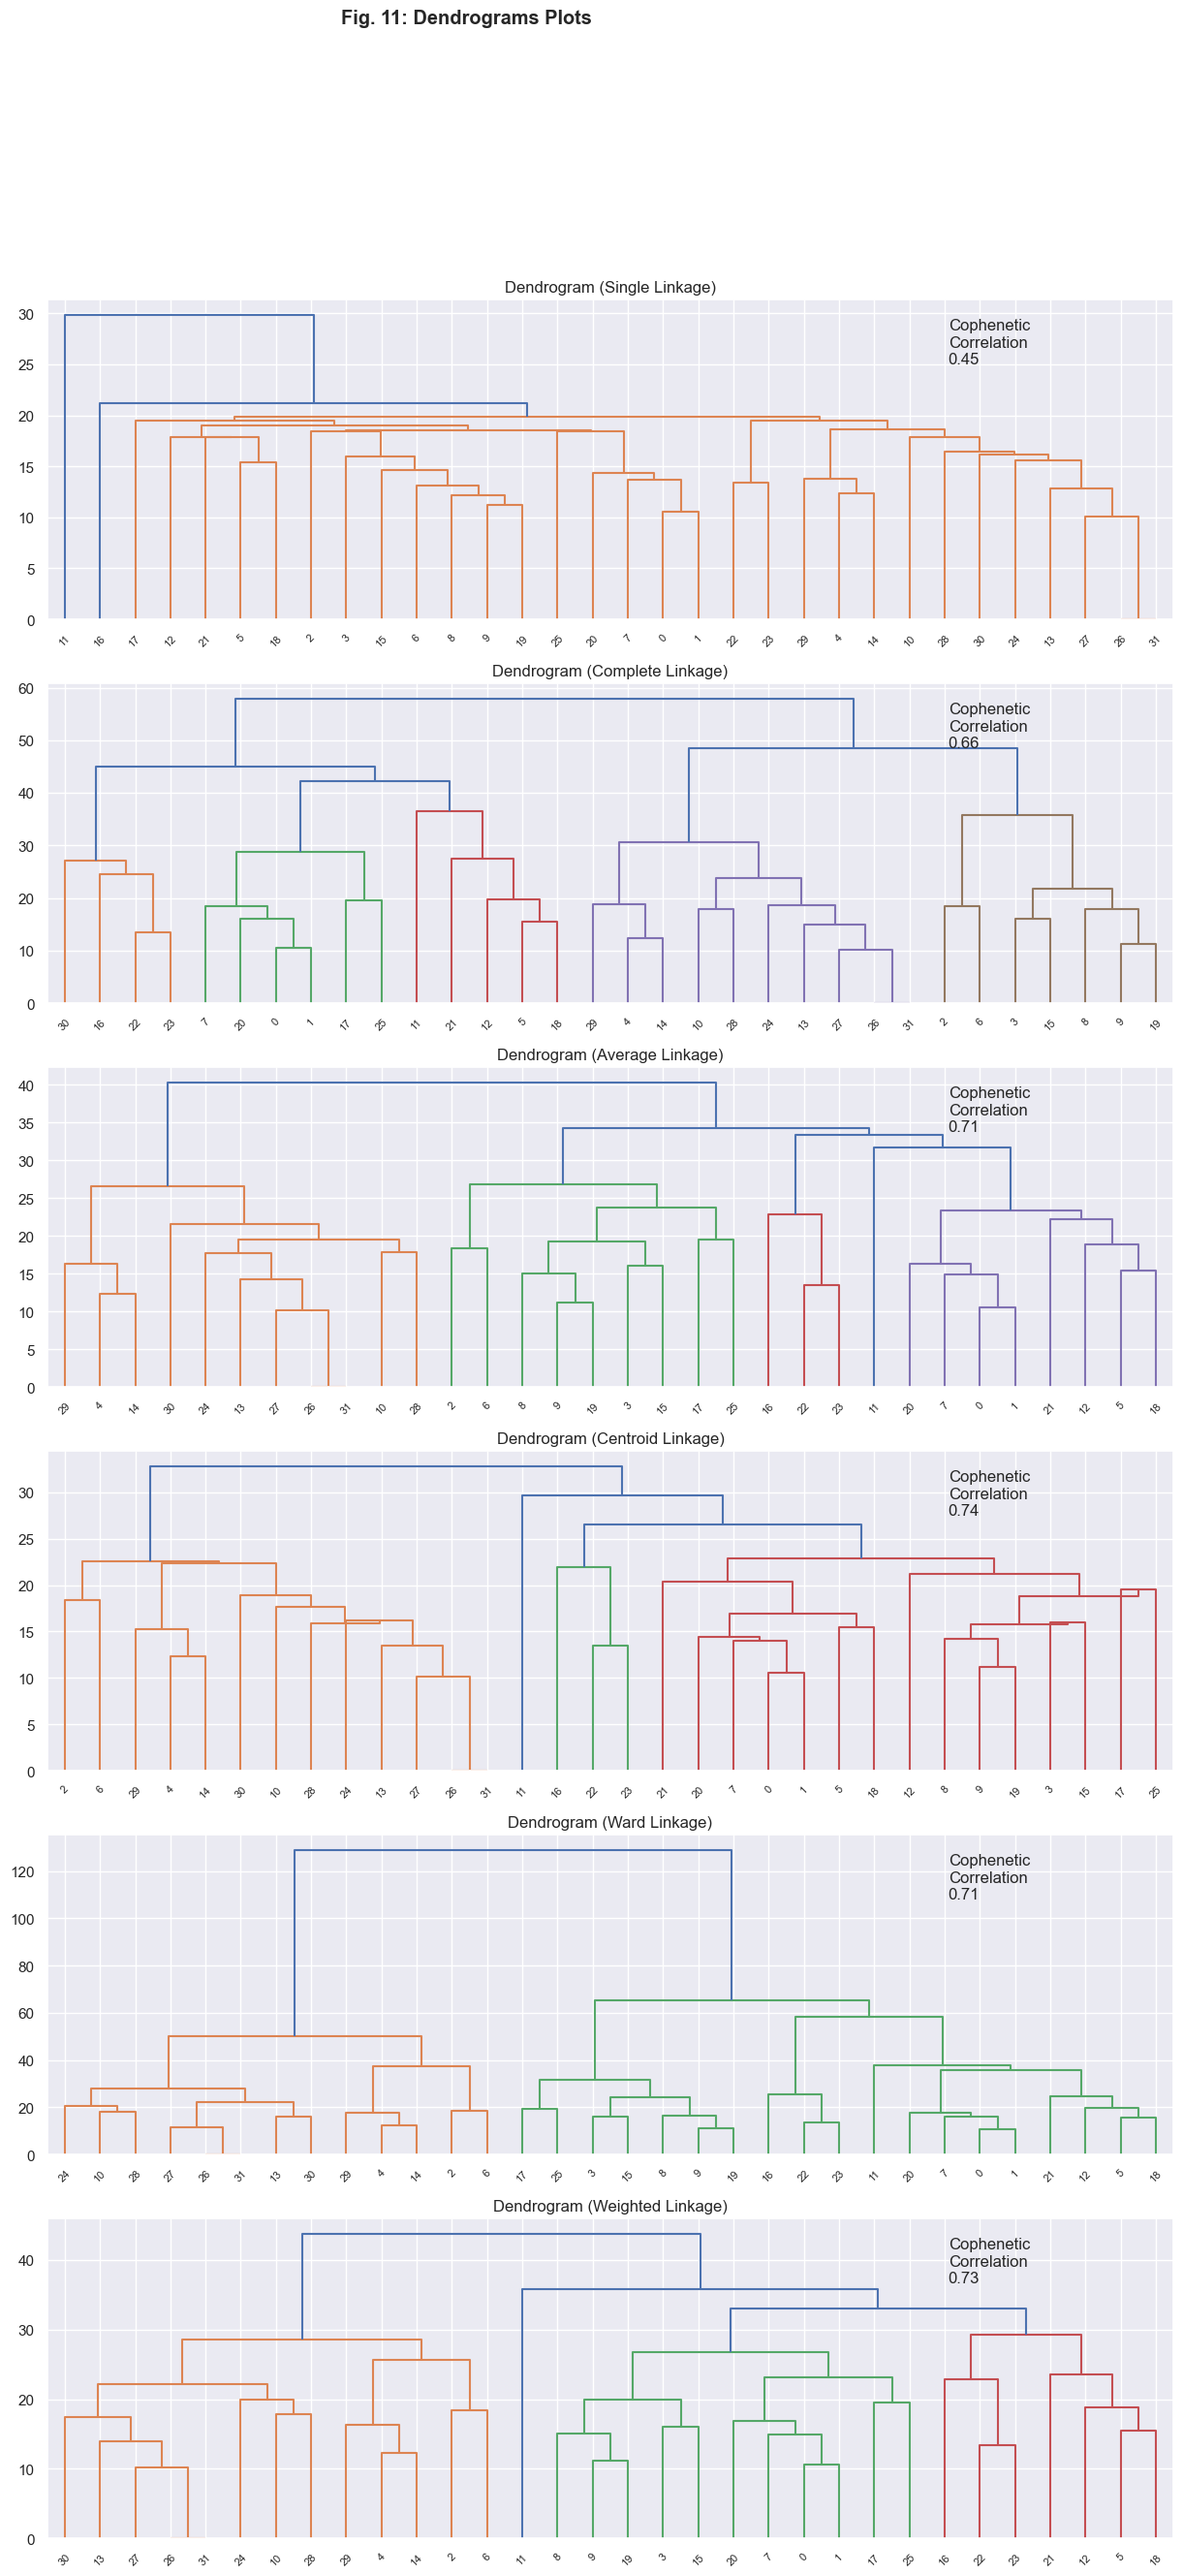

In [116]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
compare_cols = ["Linkage", "Cophenetic Coefficient"]

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df.T, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    fig.suptitle(
        "Fig. 11: Dendrograms Plots", fontweight="bold", horizontalalignment="right"
    )

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df.T))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [115]:
HCmodel = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df.T)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [108]:
df_currencies_t = df_currencies.T
subset_scaled_df_t = subset_scaled_df.T

subset_scaled_df_t["HC_Clusters"] = HCmodel.labels_
df_currencies_t["HC_Clusters"] = HCmodel.labels_

In [117]:
for cl in df_currencies_t["HC_Clusters"].unique():
    print(
        "The",
        df_currencies_t[df_currencies_t["HC_Clusters"] == cl].iloc[:, 0].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df_currencies_t[df_currencies_t["HC_Clusters"] == cl].iloc[:, 0].index)
    print("-" * 100, "\n")

The 12 Securities in cluster 0 are:
Index(['kes', 'ars', 'cop', 'ngn', 'rub', 'clp', 'idr', 'inr', 'try', 'brl',
       'mxn', 'zar'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 

The 9 Securities in cluster 2 are:
Index(['php', 'myr', 'euro', 'huf', 'ron', 'krw', 'thb', 'pln', 'jpy'], dtype='object')
---------------------------------------------------------------------------------------------------- 

The 10 Securities in cluster 1 are:
Index(['ils', 'cny', 'sgd', 'twd', 'gbp', 'aud', 'nzd', 'cad', 'chf', 'nok',
       'sek'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 



In [118]:
df_currencies_t.index[[11, 20, 7, 0, 1, 21, 12, 5, 18]]

Index(['rub', 'try', 'ngn', 'kes', 'ars', 'brl', 'clp', 'cop', 'inr'], dtype='object')

#### Divisive Hierarchical Clustering

한 클러스터에서부터 시작하여 원하는 수준에 이를때까지 더 작은 클러스터로 분할하는 방법 <br>
일반적으로는 잘 사용하지 않음

# Practice

In [121]:
# 1. day19 주식 데이터
celltrion_2021 = pd.read_csv('./data/celltron_2021.csv', encoding='cp949', usecols=['일자', '종가'])
celltrion_2023 = pd.read_csv('./data/celltron_2023.csv', encoding='cp949', usecols=['일자', '종가'])
hynix_2021 = pd.read_csv('./data/hynix_2021.csv', encoding='cp949', usecols=['일자', '종가'])
hynix_2023 = pd.read_csv('./data/hynix_2023.csv', encoding='cp949', usecols=['일자', '종가'])
samsung_2021 = pd.read_csv('./data/samsung_2021.csv', encoding='cp949', usecols=['일자', '종가'])
samsung_2023 = pd.read_csv('./data/samsung_2023.csv', encoding='cp949', usecols=['일자', '종가'])

# 2. 데이터 열을 삼성, 하이닉스, 셀트리온의 종가와 일자를 새로운 데이터프레임 생성
## 방법1
df_2021 = pd.concat([
    celltrion_2021.rename(columns={'종가': 'celltrion'}),
    hynix_2021.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2021.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df_2023 = pd.concat([
    celltrion_2023.rename(columns={'종가': 'celltrion'}),
    hynix_2023.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2023.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df = pd.concat([df_2021, df_2023])

# 3. 레이블로 2021, 2023 생성
## 방법1
df_2021 = pd.concat([
    celltrion_2021.rename(columns={'종가': 'celltrion'}),
    hynix_2021.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2021.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df_2023 = pd.concat([
    celltrion_2023.rename(columns={'종가': 'celltrion'}),
    hynix_2023.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2023.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df = pd.concat([df_2021, df_2023])

# df.일자 = df.일자.apply(lambda x: x[:4])
# df.일자 = df.일자.apply(lambda x: str.split(x, '/')[0])
df.일자 = df.일자.str.split('/').explode().iloc[::3]
# df.일자 = df.일자.str.extract('(^\d{4})', expand=False)

## 방법2
# 방법1과 동일

## 방법3
# df.index = [x[0] for x in df.index.str.split('/')]
# df.index = df.index.str.extract('(^\d{4})', expand=False)

# 4. 삼성, 하이닉스, 셀트리온의 종가 정보를 차원 축소를 통해 2차원으로 변환
## 방법1, 2
df = pd.concat([
    df.filter(items=['일자']).reset_index(drop=True),
    pd.DataFrame(
        TSNE(n_components=2).fit_transform(df.iloc[:, 1:]),
        columns=['tsne1', 'tsne2'],
    )
], axis=1)

## 1. 적절한 클러스터링 로직을 통해 label 부여
## 2. 부여된 label이 어떠한 의미를 가지는지 해석

In [ ]:
## 2.
# 1. 주식 데이터의 종가, 일자 로드
celltrion_2021 = pd.read_csv('./data/celltron_2021.csv', encoding='cp949', usecols=['일자', '종가'])
celltrion_2023 = pd.read_csv('./data/celltron_2023.csv', encoding='cp949', usecols=['일자', '종가'])
hynix_2021 = pd.read_csv('./data/hynix_2021.csv', encoding='cp949', usecols=['일자', '종가'])
hynix_2023 = pd.read_csv('./data/hynix_2023.csv', encoding='cp949', usecols=['일자', '종가'])
samsung_2021 = pd.read_csv('./data/samsung_2021.csv', encoding='cp949', usecols=['일자', '종가'])
samsung_2023 = pd.read_csv('./data/samsung_2023.csv', encoding='cp949', usecols=['일자', '종가'])

# 2. 데이터 열을 삼성, 하이닉스, 셀트리온의 종가와 일자를 새로운 데이터프레임 생성
## 방법1
df_2021 = pd.concat([
    celltrion_2021.rename(columns={'종가': 'celltrion'}),
    hynix_2021.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2021.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df_2023 = pd.concat([
    celltrion_2023.rename(columns={'종가': 'celltrion'}),
    hynix_2023.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2023.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df = pd.concat([df_2021, df_2023])

## 방법2
# (
#     celltrion_2021.rename(columns={'종가': 'celltrion'})
#     .merge(hynix_2021.rename(columns={'종가': 'hynix'}), on=['일자'])
#     .merge(samsung_2021.rename(columns={'종가': 'samsung'}), on=['일자'])
# )

## 방법3
# df_2021 = pd.concat([
#     celltrion_2021.set_index('일자').rename(columns={'종가': 'celltrion'}),
#     hynix_2021.set_index('일자').rename(columns={'종가': 'hynix'}),
#     samsung_2021.set_index('일자').rename(columns={'종가': 'samsung'}),
# ], axis=1)

# df_2023 = pd.concat([
#     celltrion_2023.set_index('일자').rename(columns={'종가': 'celltrion'}),
#     hynix_2023.set_index('일자').rename(columns={'종가': 'hynix'}),
#     samsung_2023.set_index('일자').rename(columns={'종가': 'samsung'}),
# ], axis=1)

# df = pd.concat([df_2021, df_2023])



# 3. 레이블로 2021, 2023 생성
## 방법1
df_2021 = pd.concat([
    celltrion_2021.rename(columns={'종가': 'celltrion'}),
    hynix_2021.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2021.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df_2023 = pd.concat([
    celltrion_2023.rename(columns={'종가': 'celltrion'}),
    hynix_2023.rename(columns={'종가': 'hynix'}).drop(columns=['일자']),
    samsung_2023.rename(columns={'종가': 'samsung'}).drop(columns=['일자']),
    ],
    axis=1,
)

df = pd.concat([df_2021, df_2023])

# df.일자 = df.일자.apply(lambda x: x[:4])
# df.일자 = df.일자.apply(lambda x: str.split(x, '/')[0])
# df.일자 = df.일자.str.split('/').explode().iloc[::3]
# df.일자 = df.일자.str.extract('(^\d{4})', expand=False)

## 방법2
# 방법1과 동일

## 방법3
# df.index = [x[0] for x in df.index.str.split('/')]
# df.index = df.index.str.extract('(^\d{4})', expand=False)

# 4. 삼성, 하이닉스, 셀트리온의 종가 정보를 차원 축소를 통해 2차원으로 변환
## 방법1, 2
# df = pd.concat([
#     df.filter(items=['일자']).reset_index(drop=True),
#     pd.DataFrame(
#         TSNE(n_components=2).fit_transform(df.iloc[:, 1:]),
#         columns=['tsne1', 'tsne2'],
#     )
# ], axis=1)

## 방법3
# df = pd.concat([
#     pd.DataFrame(df.index, columns=['일자']),
#     pd.DataFrame(
#         TSNE(n_components=2).fit_transform(df),
#         columns=['tsne1', 'tsne2'],
#     )
# ], axis=1)

# 5. 변환된 데이터를 레이블 별로 다른 색을 주어 시각화
# px.scatter(
#     df,
#     x='tsne1',
#     y='tsne2',
#     color='일자',
# )

df = df.set_index('일자')
standard_scaler = StandardScaler()
df.iloc[:] = standard_scaler.fit_transform(df)

dbscan = DBSCAN(eps=0.3)
dbscan.fit(df)
df['label'] = dbscan.labels_.astype(str)

tsne = TSNE(n_components=2)
temp = pd.DataFrame(
    tsne.fit_transform(df.iloc[:, :-1]),
    columns=['tsne1', 'tsne2'],
    index=df.index,
)
temp = pd.concat([
    temp,
    df.filter(items=['label'])
], axis=1)

In [179]:
px.scatter(
    temp.query('label != "-1"'),
    x='tsne1',
    y='tsne2',
    color='label',
)

In [183]:
temp.query('label=="4"')

,tsne1,tsne2,label
일자,,,
2023/12/13,5.049497,22.062914,4
2023/12/12,5.232211,21.820843,4
2023/12/11,4.410792,21.828289,4
2023/12/08,3.435146,22.232006,4
2023/12/07,1.363577,22.739100,4
2023/12/06,1.659980,22.600437,4
2023/12/05,1.790133,22.775291,4
2023/12/04,4.252748,23.271788,4
2023/12/01,4.434043,23.730515,4


In [204]:
# 문제 2.
diamonds = sns.load_dataset('diamonds')

## 1. caret의 값이 0.3 이하인 데이터 추출
diamonds = diamonds.query('carat <= 0.3').reset_index(drop=True)

## 2. cut, depth, table, price, x, y, z column을 제외하고 나머지 column drop
diamonds = diamonds.drop(columns=['carat', 'color', 'clarity'])

## 3. depth, table, price, x, y, z의 값을 적절하게 스케일링
standard_scaler = StandardScaler()
temp = pd.DataFrame(
    standard_scaler.fit_transform(diamonds.iloc[:, 1:]),
    columns=['depth', 'table', 'price', 'x', 'y', 'z']
)
temp = pd.concat([
    temp,
    diamonds.filter(items=['cut'])
], axis=1)

## 4. 위의 column을 feature로 하여 clustering 로직 적용
kmeans = KMeans(n_clusters=temp.cut.nunique())
kmeans.fit(temp.iloc[:, :-1])
temp['predicted_label'] = kmeans.labels_.astype(str)

## 5. cut에 따른 clustering결과를 확인하고 위의 feature로 
##    cut을 clustering할 수 있는지 검증
tsne = TSNE(n_components=2)
temp_ = pd.DataFrame(
    tsne.fit_transform(temp.iloc[:, :-2]),
    columns=['tsne1', 'tsne2']
)
temp_ = pd.concat([
    temp_,
    temp.filter(items=['predicted_label'])
], axis=1)

px.scatter(
    temp_,
    x='tsne1',
    y='tsne2',
    color='predicted_label'
)